In [1]:
cd /Users/belfordak/Desktop/ML_mutation_viral_taxonomy/

/Users/belfordak/Desktop/ML_mutation_viral_taxonomy


In [2]:
import pandas as pd
import numpy as np
df_1 = pd.read_csv("Final_clean_dinucl_mutdevs.csv", index_col=0)
df_1.head()
df_1.shape

(765, 48)

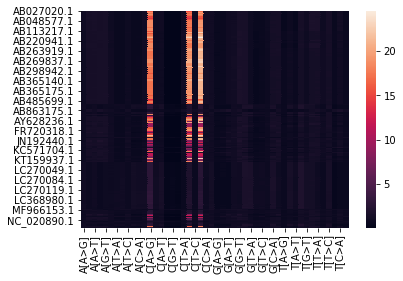

In [3]:
#whole dataset vis
import seaborn as sns
%matplotlib inline

sns.heatmap(df_1) 

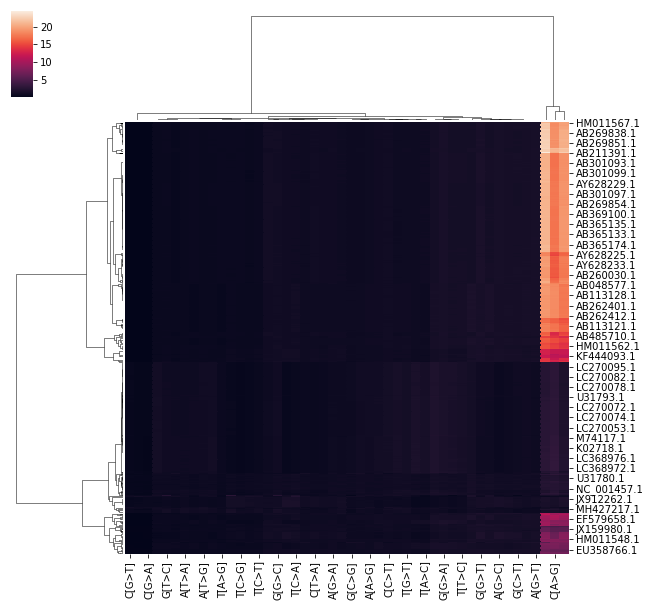

In [4]:
sns.clustermap(df_1) 

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#may or may not use all of these
import sklearn.metrics
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

## Looking into dimensionality reduction (I know it's necessary for my data)

Dimensionality (765, 48)
Pairwise distances:


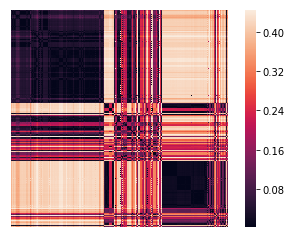

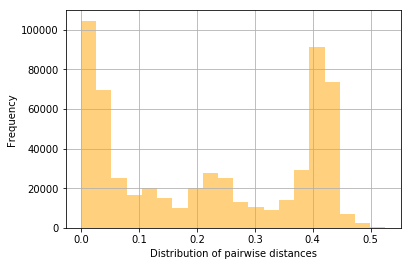

CPU times: user 2.59 s, sys: 226 ms, total: 2.82 s
Wall time: 1.65 s


In [7]:
%%time
print("Dimensionality", df_1.shape)
D = sklearn.metrics.pairwise_distances(df_1, metric='braycurtis', n_jobs=-1)
print("Pairwise distances:")
sns.heatmap(D, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.5)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

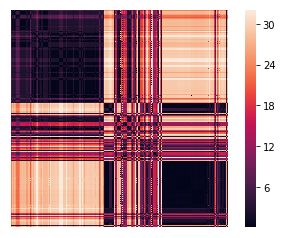

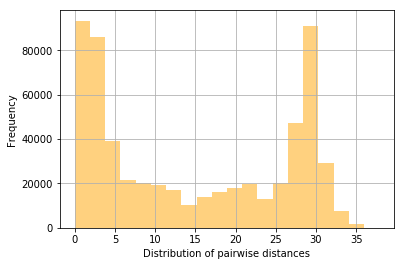

In [8]:
E = sklearn.metrics.pairwise.euclidean_distances(df_1)

sns.heatmap(E, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

plt.hist(np.hstack(E), 20, facecolor='orange', alpha=0.5)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
#CLASS CODE#### ~for below cell
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

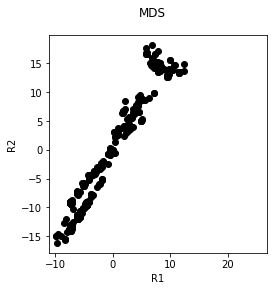

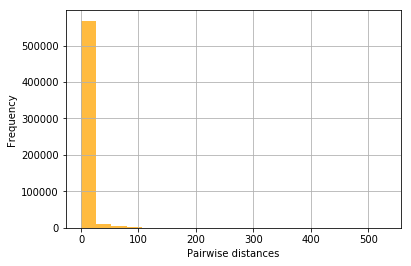

In [10]:
# non-linear transformations:
from sklearn.manifold import MDS, Isomap, TSNE

R_MDS = MDS(n_components=2).fit_transform(df_1)
scatterplot_2D(R_MDS, 'MDS') 


E = sklearn.metrics.pairwise_distances(R_MDS, metric='braycurtis', n_jobs=-1)
# sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
# plt.show()

plt.hist(np.hstack(E), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

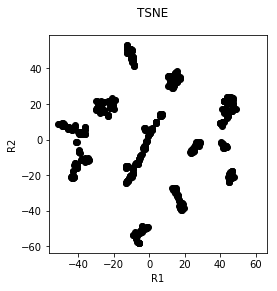

In [11]:
R_TSNE = TSNE(n_components=2, perplexity=20).fit_transform(df_1)
scatterplot_2D(R_TSNE, 'TSNE') #once I define y in np array: scatterplot_2D(R_TSNE, 'TSNE', y), y for colour

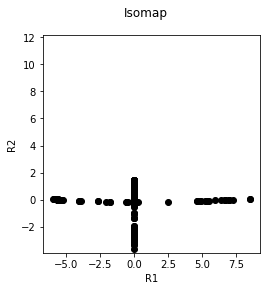

In [12]:
R_ISO = Isomap(n_components=2).fit_transform(df_1)
scatterplot_2D(R_ISO, 'Isomap') #scatterplot_2D(R_ISO, 'Isomap', y)

In [13]:
%time
df = pd.concat([pd.DataFrame(df_1), pd.DataFrame({'label': y})], axis=1)
df.head()
sns.pairplot(df, hue=('label'))

CPU times: user 16 µs, sys: 1 µs, total: 17 µs
Wall time: 7.87 µs


NameError: name 'y' is not defined

In [14]:
###THIS CODE IS NOT MINE, FROM CLASS#####
import matplotlib.pyplot as plt
%matplotlib inline

def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

## Choosing TSNE as DR method, moving on to cluster testing

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100)
df_1_tsne = tsne.fit_transform(df_1)
print(df_1_tsne.shape)

(765, 2)


In [19]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

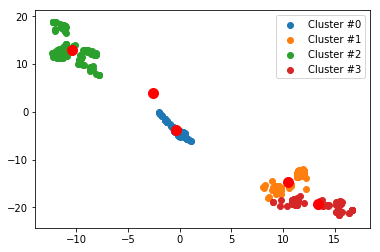

In [20]:
model.fit(df_1_tsne)
cluster_labels = model.predict(df_1_tsne)
plot_kmeans(pd.DataFrame(df_1_tsne), cluster_labels, model, 4)

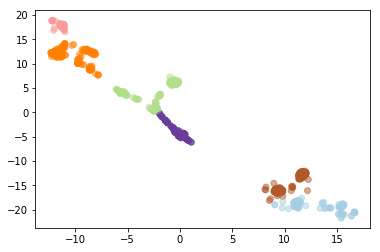

In [21]:
#kmeans
from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=6, random_state=50).fit_predict(df_1_tsne)
plt.subplot()
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], cmap='Paired', c=ktest, alpha = 0.5) 

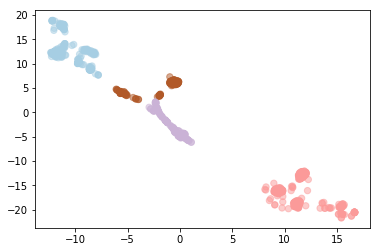

In [22]:
#regular GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(df_1_tsne)
labels = gmm.predict(df_1_tsne)
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=labels, s=40, cmap='Paired', alpha = 0.5)

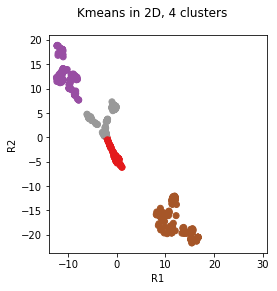

[2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1
 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 3 1 3 3 3 3 3 3 1 3
 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1
 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 1 1 1 1 3 1 3 3 3 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2
 0 0 0 0 2 3 3 1 1 3 3 1 3 1 1 1 3 3 2 2 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 3 3 3 3 3 3 1 1 1 3 1 1 1 3 3 0 0 2 0 0 0 0 0 3 3 3 3 1 1 1 1 1 3
 0 2 0 2 3 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 

NameError: name 'y' is not defined

In [23]:
# Clustering of 2D dataset obtained by TSNE transformation
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(df_1_tsne)

# visualization in 2D with the help of TSNE transformation
scatterplot_2D(df_1_tsne, 'Kmeans in 2D, 4 clusters', kmeans.labels_)

print(kmeans.labels_)
print("V measure", sklearn.metrics.cluster.v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", sklearn.metrics.cluster.adjusted_rand_score(y, kmeans.labels_))

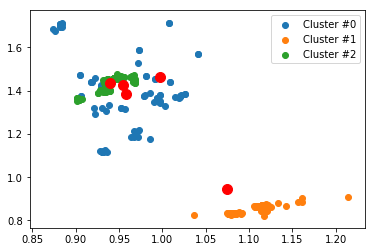

In [24]:
model = KMeans(n_clusters=5)
model.fit(df_1)
cluster_labelss = model.predict(df_1)
plot_kmeans(pd.DataFrame(df_1), cluster_labels, model, 3)

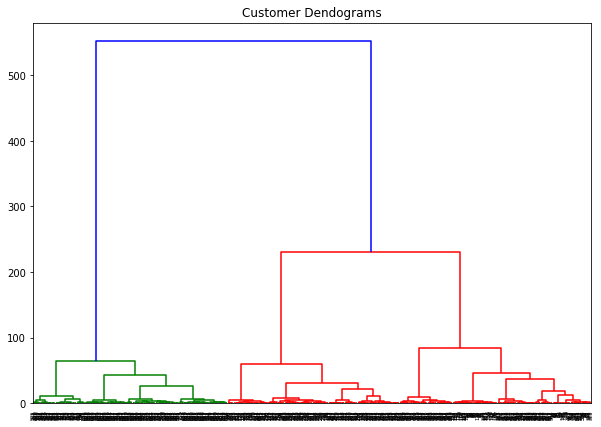

In [25]:
#histo for fun
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df_1_tsne, method='ward'))  

## Evaluation (of TSNE reduced)

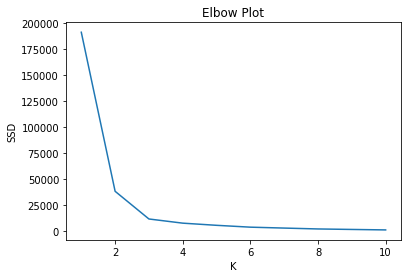

In [26]:
#Elbow method ##class code

def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(df_1_tsne, 10)

/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


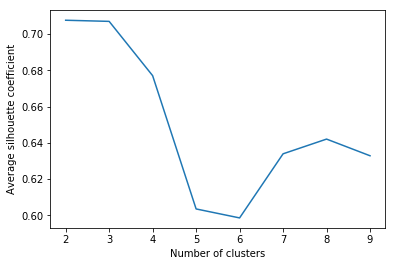

In [27]:
# Silhouette is used for assessing the performance of an unlabeled dataset ##class code
from sklearn.metrics.cluster import silhouette_score

def calc_silhouette(dataset, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = KMeans(n_clusters=n).fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    return score

scores = {n: calc_silhouette(df_1_tsne, n) for n in range(2, 10)}
# pprint.pprint(scores)
plt.plot(
    list(scores.keys()),
    list(scores.values())
)

plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.show()

In [28]:
# Showing silhouette coefficient for each sample in each basically better for dense blobs ##class code
# cluster is a powerful diagnostic tool
from sklearn.metrics.cluster import silhouette_samples

def plot_silhouette_diagnostics(n_clusters):
    # Compute the silhouette scores for each sample
    kmeans = KMeans(n_clusters=n_clusters).fit(df_1_tsne)
    lbls = kmeans.labels_
    values = silhouette_samples(df_1_tsne, lbls)

    g, ax = plt.subplots(figsize=(8, 6))
    color_scale = np.linspace(0, 1, n_clusters)
    y_lower = 1
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        v = sorted(values[lbls == i])
        cluster_size = len(v)
        y_upper = y_lower + cluster_size

        # color mapping:
        c = plt.cm.Set1(color_scale[i])
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, v, facecolor=c, edgecolor=c, alpha=0.5)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 1

    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")

    # Red dashed line shows an average silhouette score across all samples in all clusters
    score = silhouette_score(df_1_tsne, lbls, metric='l2')
    ax.axvline(x=score, color="red", linestyle="--")
    ax.set_yticks([])
    plt.show()

/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


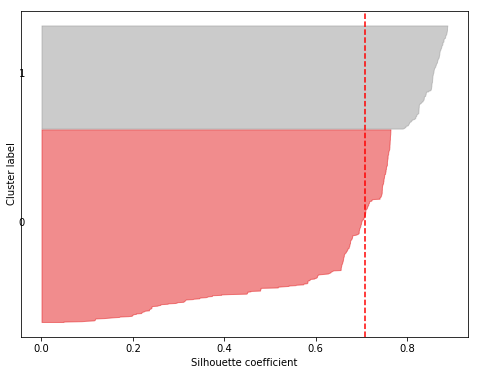

In [29]:
plot_silhouette_diagnostics(2)

/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


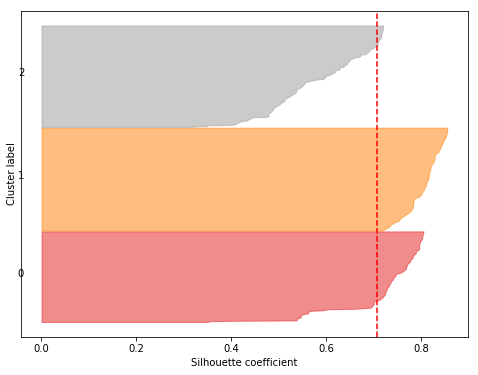

In [30]:
plot_silhouette_diagnostics(3)

/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


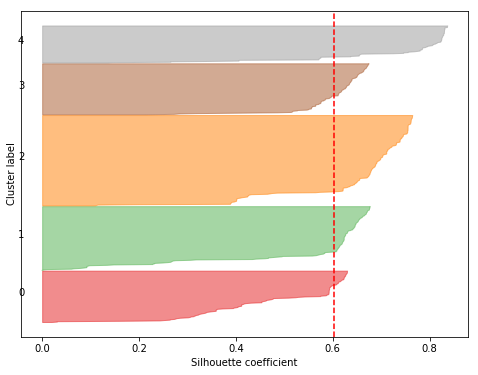

In [31]:
plot_silhouette_diagnostics(5)

/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


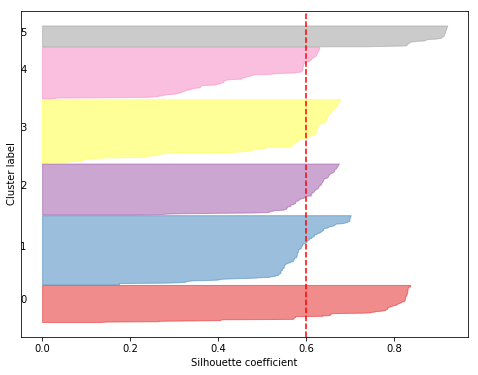

In [32]:
plot_silhouette_diagnostics(6)

/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


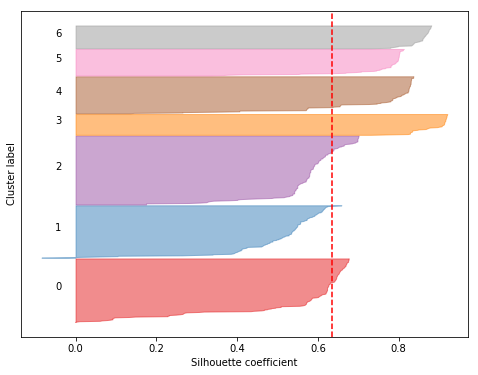

In [33]:
plot_silhouette_diagnostics(7) #I'd say 6 is the maximum number of clusters. The 7th cluster is just barely over the average ilhouette score

In [34]:
#below is better code from scikit, produces a slightly different output, but still the same conclusion of max 6 clusters. 
#5 may be better owing to size of plot bars being more similar thatn with c = 6, and the one cluster bar being far over avg silohuette score = overfitting (?)
#matches the silhoette line plot above, not elbow though 
##can replace df_1_tsne with df_1_mds to view that. The results do not look as good as tsne (only a few clusters reasonably above averge, until higher # [overfitting]) 

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.70758975


/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For n_clusters = 3 The average silhouette_score is : 0.706966
For n_clusters = 4 The average silhouette_score is : 0.6770156
For n_clusters = 5 The average silhouette_score is : 0.6034833
For n_clusters = 6 The average silhouette_score is : 0.59853107
For n_clusters = 7 The average silhouette_score is : 0.6338979


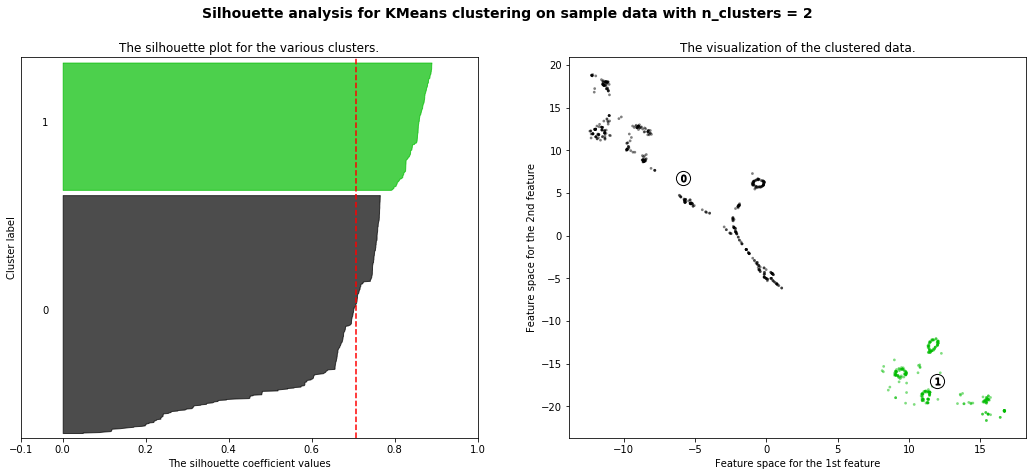

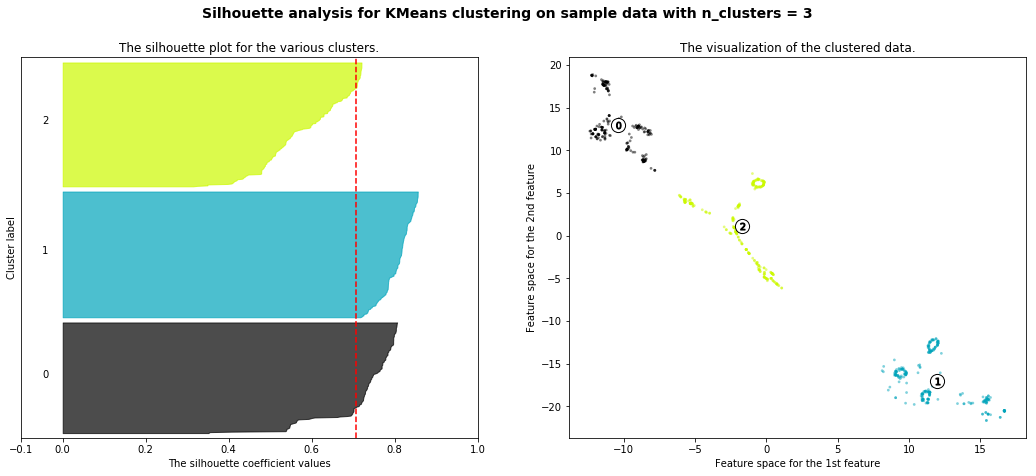

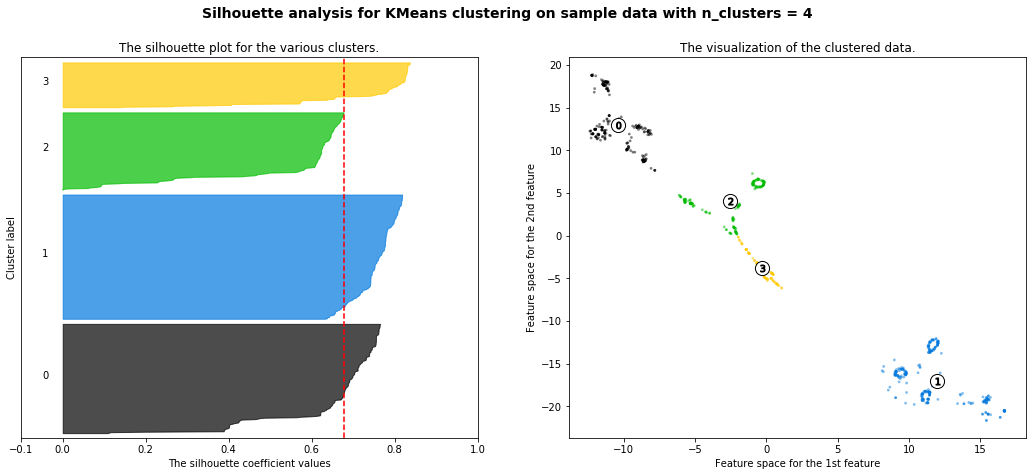

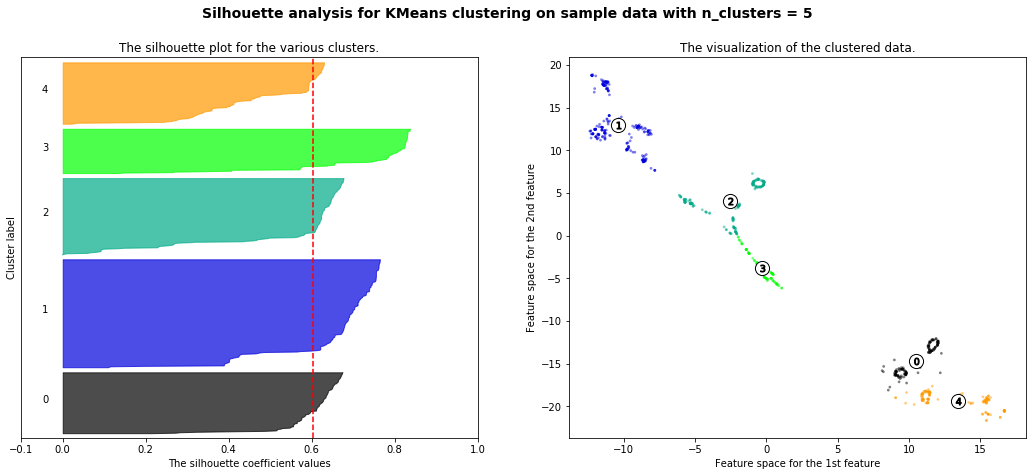

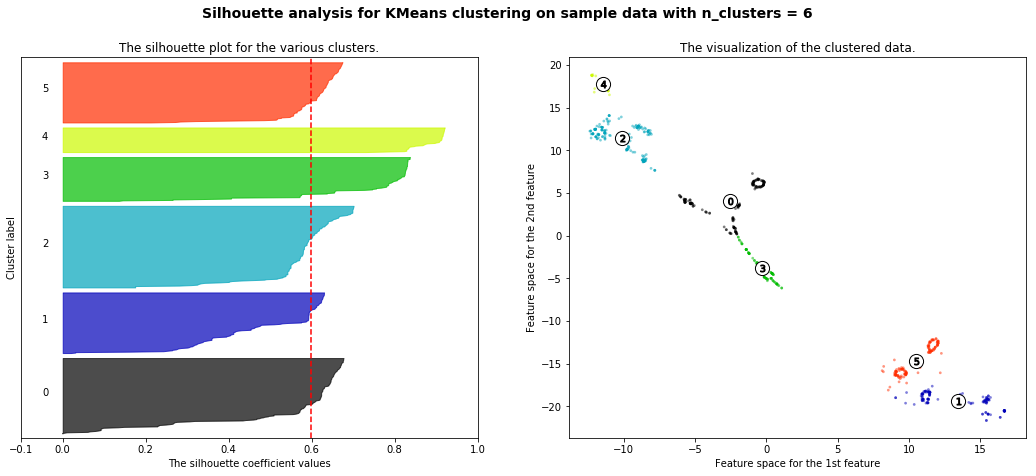

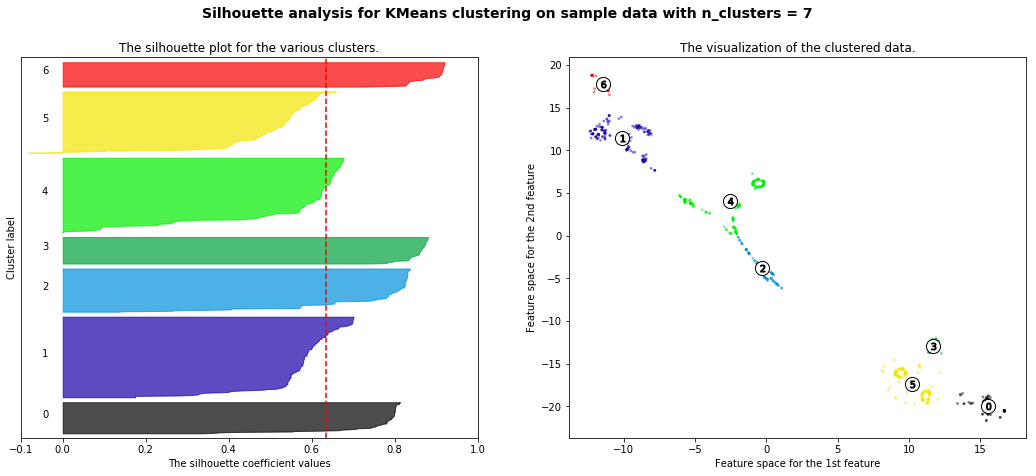

In [35]:
###code not mine, from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html####

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_1_tsne) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_1_tsne)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_1_tsne, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_1_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## predict

In [36]:
id_index = df_1.index 

In [37]:
y_pred = KMeans(n_clusters=6, random_state=160).fit_predict(df_1_tsne)


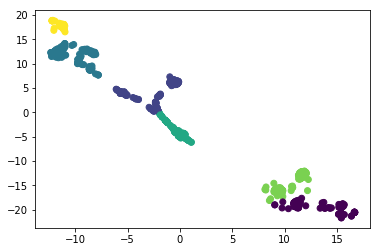

In [38]:
plt.subplot()
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=y_pred)

In [39]:
gmm = GaussianMixture(n_components=6).fit(df_1_tsne)
labels = gmm.predict(df_1_tsne)

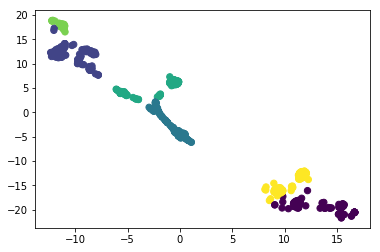

In [40]:
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=labels, s=40)

## Model evaluation - this method is not fully completed, to get true cluster validation, I need to pull which datasets this subset coresponds to and see if clustering matches with the full dataset

In [41]:
#Run the model with different data (same data split/changed) 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
test_1, test_2 = train_test_split(df_1_tsne, shuffle=False)
test_2

array([[ 9.63615990e+00, -1.65648346e+01],
       [ 9.46929741e+00, -1.54591017e+01],
       [ 9.25561333e+00, -1.65719585e+01],
       [ 9.78999519e+00, -1.62617683e+01],
       [ 9.04982090e+00, -1.58701887e+01],
       [ 9.75019836e+00, -1.58941174e+01],
       [ 9.08033848e+00, -1.63354683e+01],
       [ 9.72168541e+00, -1.62587395e+01],
       [ 9.08033848e+00, -1.63354683e+01],
       [ 9.08033848e+00, -1.63354683e+01],
       [ 9.65331364e+00, -1.56983700e+01],
       [ 9.58187675e+00, -1.56892042e+01],
       [ 9.76133251e+00, -1.62205849e+01],
       [ 9.00115204e+00, -1.62103233e+01],
       [ 1.09191360e+01, -1.85627384e+01],
       [ 1.09154911e+01, -1.89306126e+01],
       [ 1.09444580e+01, -1.92976036e+01],
       [ 1.14183302e+01, -1.85855560e+01],
       [ 1.14376478e+01, -1.86292133e+01],
       [ 1.09864435e+01, -1.91607838e+01],
       [ 1.11819477e+01, -1.83533001e+01],
       [ 1.11880398e+01, -1.96238213e+01],
       [ 1.09300327e+01, -1.88270741e+01],
       [ 1.

In [44]:
y_pred_test_2 = KMeans(n_clusters=6, random_state=160).fit_predict(test_2)

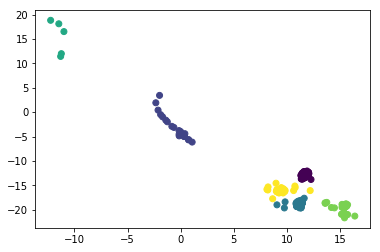

In [45]:
plt.scatter(test_2[:, 0], test_2[:, 1], c=y_pred_test_2)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    df_1_tsne, df_1_tsne)

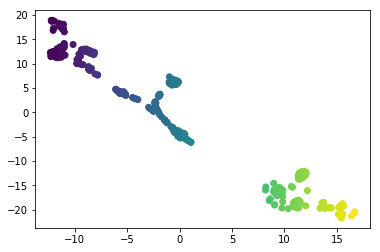

In [47]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:,0])

In [48]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(573, 2) (573, 2)
(192, 2) (192, 2)


In [49]:
model_testing = model.fit(X_train, y_train)
predictions = kmeans.predict(X_test)

In [50]:
X_test

array([[-5.24969053e+00,  3.84446144e+00],
       [-1.20297647e+00, -2.09613943e+00],
       [-1.44605786e-01, -4.85540867e+00],
       [ 1.66707668e+01, -2.05551548e+01],
       [-2.55312538e+00,  3.15734059e-01],
       [-1.76953006e+00, -7.34243989e-01],
       [-2.24881005e+00,  8.85560572e-01],
       [ 6.73388839e-02, -5.08513832e+00],
       [-5.12530041e+00,  3.45261574e+00],
       [ 4.76454318e-01, -4.55509281e+00],
       [-9.05517292e+00,  1.26422682e+01],
       [-9.76214790e+00,  1.00956316e+01],
       [ 4.07803535e-01, -4.41290426e+00],
       [-3.86201173e-01,  5.69142246e+00],
       [ 9.77211285e+00, -1.63207245e+01],
       [-8.53007317e+00,  9.36221600e+00],
       [-6.97441101e-01,  6.52229214e+00],
       [ 1.09227543e+01, -1.85043812e+01],
       [ 1.66855659e+01, -2.05368309e+01],
       [-1.38583705e-01, -4.30608416e+00],
       [-1.15489016e+01,  1.27224426e+01],
       [ 9.28839016e+00, -1.55613651e+01],
       [-1.20371127e+00, -2.08973241e+00],
       [-8.

In [51]:
#I will continue with these evaluations

## Reassigning clusters to viruses (***assumes dimensionality reduction did not change the order of the viruses/index***)

In [52]:
y_pred.shape
y_pred

array([4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 5, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 5, 5, 5, 5, 5, 5, 0, 2, 2, 2, 5, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 5, 1, 2, 2, 5, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 5, 1, 2, 2, 2, 1, 5, 2, 2, 2, 2, 2, 2, 2, 5,
       5, 2, 5, 2, 2, 1, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 0, 5, 2, 2, 2, 1, 2, 1,
       2, 5, 5, 1, 5, 5, 5, 2, 2, 2, 5, 2, 5, 5, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,

In [53]:
df_1_tsne

array([[  9.829265, -17.270584],
       [  8.545939, -18.10143 ],
       [  9.0612  , -18.991129],
       ...,
       [ 15.580734, -19.19201 ],
       [ 15.327   , -19.334688],
       [ 15.705286, -18.96224 ]], dtype=float32)

In [54]:
#dimensionality reduction should not have changed the order of the rows/index, so I'm pretty sure I can combine 
#predict/cluster output with index of df_1

df_1.head()

,A[A>G],A[A>C],A[A>T],A[G>C],A[G>T],A[G>A],A[T>A],A[T>G],A[T>C],A[C>G],...,T[A>T],T[G>C],T[G>T],T[G>A],T[T>A],T[T>G],T[T>C],T[C>G],T[C>A],T[C>T]
AB027020.1,1.122482,0.869765,1.050062,0.774859,0.935483,0.890883,0.952324,1.068967,0.828299,1.290557,...,0.990858,1.992374,1.312964,1.325079,1.009227,0.761635,1.517462,0.501914,0.665075,0.658995
AB027021.1,1.214531,0.908696,1.052079,0.748187,0.866243,0.823363,0.950499,1.154411,0.863715,1.336565,...,0.953254,2.193369,1.312812,1.377189,1.049038,0.761724,1.670742,0.455920,0.627888,0.598537
AB040456.1,1.088414,0.892804,1.038254,0.820280,0.953915,0.918768,0.963155,1.048311,0.859909,1.219096,...,1.025970,2.131239,1.327807,1.294197,0.974688,0.753122,1.605082,0.469211,0.607251,0.623021
AB048545.1,1.032820,1.478643,1.553955,1.431657,1.504575,0.968223,0.643519,0.664639,0.951536,0.698491,...,0.593047,1.456085,1.019400,1.718919,1.686206,0.980969,1.428375,0.686773,1.180507,0.700096
AB048546.1,1.037084,1.465164,1.552793,1.412773,1.497269,0.964242,0.644001,0.667883,0.943567,0.707828,...,0.591687,1.473702,1.027263,1.736160,1.690083,0.973460,1.434590,0.678563,1.178094,0.697063


In [55]:
#just need to figure out if dimensionality reduction changes the df order
df = pd.DataFrame(y_pred)
df.head()
namestemp =  list(df_1.index)
namestemp

clusterstemp = list(y_pred)
clusterstemp

clustname = zip(namestemp, clusterstemp)
final_out = list(zip(namestemp, clusterstemp))
df_f_o = pd.DataFrame(final_out)
df_f_o.to_csv("ML_virus_to_clusters_match.csv")

## Above is all on tsne dimensionality reduction, which was the final choice. Below is code for me looking at other methods


In [64]:
from sklearn.manifold import MDS
work = MDS(n_components=6)
df_1_mds = work.fit_transform(df_1)

In [65]:
#Dimensionality reduction options = 1) TSNE (above) 2) MDS

y_pred_mds = KMeans(n_clusters=6, random_state=160).fit_predict(df_1_mds)

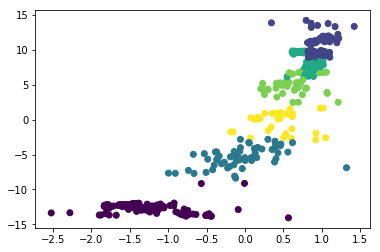

In [66]:
plt.subplot()
plt.scatter(df_1_mds[:, 0], df_1_mds[:, 1], c=y_pred_mds)

In [67]:
# I looked at biological data with MDS clusters just to see
df_mds = pd.DataFrame(y_pred_mds)
df_mds.head()
namestemp_mds =  list(df_1.index)
namestemp_mds

clusterstemp_mds = list(y_pred_mds)
clusterstemp_mds

clustname_mds = zip(namestemp_mds, clusterstemp_mds)
final_out_mds = list(zip(namestemp_mds, clusterstemp_mds))
df_f_o_mds = pd.DataFrame(final_out_mds)
df_f_o_mds.to_csv("ML_virus_to_clusters_MDS_TEST.csv")

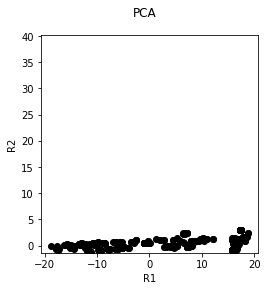

In [68]:
R_PCA = sklearn.decomposition.PCA(n_components=2).fit_transform(df_1)
scatterplot_2D(R_PCA, 'PCA')

[[ 3.74134571e-03 -1.61954057e-02 -1.44636311e-02 -1.99275841e-02
  -1.86694818e-02 -3.52220648e-03  9.53485255e-03  1.28135356e-02
  -2.10563810e-03  1.64887712e-02  1.27023353e-02  2.97241240e-03
  -5.17058041e-01  8.23056031e-03  1.39122549e-02  1.26580030e-02
   1.53925812e-02  1.11877752e-02 -1.00968748e-02 -5.78437660e-01
  -2.62979791e-03 -6.27055596e-01 -8.64774386e-03  4.23091718e-03
   1.73212668e-03  3.58744472e-04 -9.55937692e-03 -2.83382855e-03
  -1.91874810e-02 -8.83041411e-04  1.75735346e-02  1.11253971e-02
   1.02298954e-02  2.60131415e-03  3.46967296e-03 -1.37457000e-02
   1.28617708e-03  1.13900371e-02  8.32440925e-03  1.26443559e-02
   9.32837285e-03 -2.80930085e-03 -1.22620391e-02 -7.13380139e-03
  -8.90449235e-04 -3.53274995e-03 -6.58600330e-03  1.40357113e-03]
 [-5.72931838e-02  1.31077331e-01  2.49120261e-02  2.00189339e-01
   9.29456088e-02  5.72167138e-02 -2.29822215e-02 -7.29277031e-02
   9.20745195e-02 -1.57608442e-01 -1.05086669e-01 -9.14709233e-02
  -4.8337

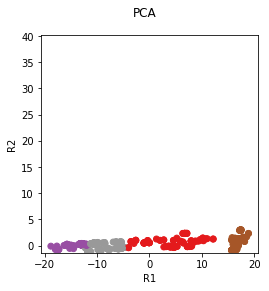

In [69]:
# Examples of projection to 2D via decomposition

# NOTE THAT THERE IS .fit(X) and .transform(X)

# Principal Component Analysis
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(df_1)
print(pca.components_)
print(np.round(pca.explained_variance_ratio_ * 100))
R_PCA = pca.transform(df_1)
scatterplot_2D(R_PCA, 'PCA', kmeans.labels_) #kmeans.labels just to see, not actually valid

[[ 6.74400800e-02 -2.56497978e-01 -1.83033740e-01 -3.26658403e-01
  -2.57529112e-01 -6.45762754e-02  1.23651093e-01  1.84194629e-01
  -7.20057108e-02  2.70253639e-01  2.02683487e-01  8.04482602e-02
  -5.25390086e+00  1.15870441e-01  2.36486495e-01  1.29453431e-01
   1.80423078e-01  1.03919596e-01 -1.74540699e-01 -6.09561159e+00
  -7.14003065e-02 -6.46493330e+00 -1.19549130e-01  9.90064112e-02
  -4.46770865e-02 -7.22963494e-02 -2.29141255e-01 -3.81051922e-02
  -2.72465068e-01  1.01680685e-01  3.42875072e-01  1.61232547e-01
   1.48791280e-01  3.23493547e-02  1.44911899e-01 -2.02980268e-01
   1.76117243e-02  2.43619782e-01  1.34596008e-01  2.89966367e-01
   1.54671205e-01 -3.86501470e-02 -1.95907276e-01 -1.19160027e-01
   6.47227155e-02 -1.20143570e-01 -1.86208261e-01 -3.67826530e-02]
 [-8.24197005e-03 -3.97766284e-02 -9.82741430e-02 -2.74883113e-02
  -8.97613313e-02  9.84643159e-03  6.49581838e-02  5.58684463e-02
   4.90451511e-02  2.04186844e-02  2.77755948e-02 -4.33490010e-02
  -3.6070

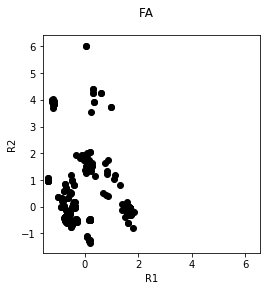

In [70]:
# Factor Analysis (implementation of EM with Gaussian latent variables)
fa = sklearn.decomposition.FactorAnalysis(n_components=2)
fa.fit(df_1)
R_FA = fa.transform(df_1)
print(fa.components_)

scatterplot_2D(R_FA, 'FA')

[[0.38971694 1.91297586 1.97190147 1.76966485 1.92092668 1.83811804
  0.16465752 0.12470535 1.05725229 0.12890614 0.1266948  1.02399449
  1.94471701 0.09433769 0.21917181 0.         0.         0.00492068
  1.82158892 1.96630624 0.98388439 1.9694631  2.17803651 0.98493718
  0.41116739 0.27470575 1.22297762 0.64226636 2.00800369 1.50620126
  0.43976452 0.09702413 0.11072168 1.01573772 1.44481483 1.89049191
  1.03029757 0.7982218  0.31981335 0.78537007 0.23206242 1.11219256
  1.73991346 1.93062939 1.51774533 0.93619389 0.76681964 0.48492722]
 [1.09742293 0.03689552 0.406334   0.02355657 0.20317117 0.50716619
  1.04875048 1.29643518 0.20079402 1.5965932  1.60675227 1.43185522
  0.08939735 1.00956265 1.51440954 0.49876945 0.73818272 0.51748814
  0.0942448  0.         0.24073967 0.03940761 0.49334831 1.34102243
  0.15713827 0.08075275 0.05796379 0.37077409 0.31052874 1.38894872
  1.54826482 1.09062582 0.46654722 0.89096058 1.45569604 0.66888034
  1.01295717 1.48770661 1.4350935  1.46137039 1

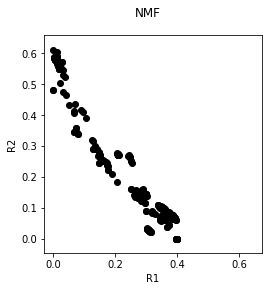

In [71]:
# Nonnegative matrix factorization
# NMF requires non-negative values

df_1_nonnegative = sklearn.preprocessing.MinMaxScaler().fit_transform(df_1)

nmf = sklearn.decomposition.NMF(n_components=2)

nmf.fit(df_1_nonnegative)
print(nmf.components_)

R_NMF = nmf.transform(df_1_nonnegative)

scatterplot_2D(R_NMF, 'NMF')